# L2: Text classification

# Omkar Bhutra (omkbh878)

Text classification is the task of sorting text documents into predefined classes. The concrete problem you will be working on in this lab is the classification of texts with respect to their political affiliation. The specific texts you are going to classify are speeches held in the [Riksdag](https://www.riksdagen.se/en/), the Swedish national legislature.

## Data set

The raw data for this lab comes from [The Riksdag’s Open Data](https://data.riksdagen.se/in-english/). We have tokenized the speeches and put them into two compressed [JSON](https://en.wikipedia.org/wiki/JSON) files:

* `speeches-201718.json.bz2` (speeches from the 2017/2018 parliamentary session)
* `speeches-201819.json.bz2` (ditto, from the 2018/2019 session)

We start by loading these files into two separate data frames.

In [2]:
import pandas as pd
import bz2

with bz2.open("speeches-201718.json.bz2") as source:
    speeches_201718 = pd.read_json(source)

with bz2.open("speeches-201819.json.bz2") as source:
    speeches_201819 = pd.read_json(source)

When you inspect the two data frames, you can see that there are three labelled columns: `id` (the official speech ID), `words` (the space-separated words of the speech), and `party` (the party of the speaker, represented by its customary abbreviation).

In [3]:
speeches_201718.head()

,id,party,words
0,H5-002-004,S,eders majestäter eders kungliga högheter herr ...
1,H5-003-001,V,aktuell debatt om situationen för ensamkommand...
2,H5-003-002,S,herr talman och ledamöter jag vill börja med a...
3,H5-003-003,M,herr talman åhörare den här debatten handlar a...
4,H5-003-004,SD,herr talman ansvar och rättssäkerhet är två or...


In [4]:
speeches_201819.head()

,id,party,words
0,H6-001-001,M,hälsningsanförande från ålderspresidenten ärad...
1,H6-001-002,S,fru ålderspresident ärade ledamöter av sverige...
2,H6-001-003,M,fru ålderspresident ärade ledamöter av sverige...
3,H6-001-004,S,val av förste vice talman val av andre vice ta...
4,H6-001-005,SD,ärade fru ålderspresident och likaledes ärade ...


Throughout the lab, we will be using the speeches from 2017/2018 as our training data, and the speeches from 2018/2019 as our test data.

In [5]:
training_data, test_data = speeches_201718, speeches_201819

For later reference, we store the sorted list of party abbreviations.

In [6]:
parties = sorted(training_data["party"].unique())
print(parties)

['C', 'KD', 'L', 'M', 'MP', 'S', 'SD', 'V']


## Problem 1: Visualization

Your first task is to get to know the data better by plotting a simple visualization.

If you are not familiar with the Swedish political system and the parties represented in the Riksdag in particular, then we suggest that you have a look at the Wikipedia article about the [2018 Swedish general election](https://en.wikipedia.org/wiki/2018_Swedish_general_election).

For the lab, we ask you to compare the two data frames with respect to the distribution of the speeches over the different parties. Write code to generate two bar plots that visualize this information, one for the 2017/2018 speeches and one for the 2018/2019 speeches. Inspect the two plots, and compare them

* to each other
* to the results of the 2014 and the 2018 general elections

Summarize your observations in a short text in the cell below.

**Tip:** If you need help with creating bar plots, [Bar Plot using Pandas](https://dfrieds.com/data-visualizations/bar-plot-python-pandas) provides a useful tutorial.

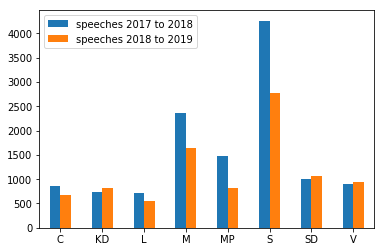

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
#matplotlib inline
speeches201718 = speeches_201718.groupby('party').size().tolist()
speeches201819 = speeches_201819.groupby('party').size().tolist()
df = pd.DataFrame({'speeches 2017 to 2018': speeches201718,'speeches 2018 to 2019': speeches201819}, index=parties)
ax = df.plot.bar(rot=0)

The parties Swedish Social Democratic Party has the highest number of speeches in both the year periods 2017-18 and 2018-19, followed by the Moderate Party. Although the number of speeches by both the parties have reduced in number in the latter year.
This is also seen in the 2014 and 2018 election results where the Swedish Social Democratic Party received the share of 31.0% in the Riksdag in 2014 followed by the Moderate Party which received 23.3% of the share in 2014. 'S' received 28.26% in 2018 and 'M' received 19.84% share in 2018.
The top 2 parties by riksdag seats are also the ones with highest number of speeches made.

## Problem 2: Naive Bayes classifier

You are now ready to train and evaluate a classifier. More specifically, we ask you to train a [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) classifier. You will have to

1. vectorize the speeches in the training data
2. instantiate and fit the Naive Bayes model
3. evaluate the model on the test data

The scikit-learn library provides a convenience class [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that allows you to solve the first two tasks with very compact code. For the evaluation you can use the function [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), which will report per-class precision, recall and F1, as well as overall accuracy.

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('clf', MultinomialNB()), 
])

In [112]:
text_clf.fit(training_data.words, training_data.party)
#Pipeline(...)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [113]:
import numpy as np
predicted = text_clf.predict(test_data.words)
print('The Accuracy is %s' % np.mean(predicted == test_data.party))

The Accuracy is 0.4280792420327304


In [114]:
cr = classification_report(y_true = test_data.party,
                      y_pred = predicted,
                      labels=None, target_names=parties,
                      sample_weight=None, digits=2,
                      output_dict=False)
print('The Accuracy is %s' % accuracy_score(predicted, test_data.party))
print(cr)

The Accuracy is 0.4280792420327304
              precision    recall  f1-score   support

           C       0.63      0.04      0.07       671
          KD       0.70      0.02      0.03       821
           L       0.92      0.02      0.04       560
           M       0.36      0.68      0.47      1644
          MP       0.36      0.25      0.29       809
           S       0.46      0.84      0.59      2773
          SD       0.57      0.12      0.20      1060
           V       0.59      0.15      0.24       950

    accuracy                           0.43      9288
   macro avg       0.57      0.26      0.24      9288
weighted avg       0.52      0.43      0.34      9288



Would you have expected the results that you got?

## Problem 3: Baseline

Evaluation metrics such as accuracy should not be understood as absolute measures of performance, but should be used only to compare different classifiers. When other classifiers are not available, a simple baseline for text classification is **Most Frequent Class (MFC)**. One way to think of this baseline is as a classifier that, for every document, predicts that class which appears most often in the training data.

Determine the most frequent class in the 2017/2018 data. What is the accuracy of the MFC baseline on the test data? Given this baseline accuracy, how do you assess the results of the Naive Bayes classifier from Problem&nbsp;2? Answer with a short text.

In [12]:
# TODO: Write code here to print the baseline accuracy
print('The Accuracy is %s' % np.mean(test_data.party == training_data.party.mode()[0]))

The Accuracy is 0.298557278208441


*The most frequent class in the training data (2017/2018 data) is found using mode function. It is reported to be Socialdemokraterna (S). The accuracy is calculated based on this MFC which is very close to the multinomial naive bayes classification.*

## Problem 4: Creating a balanced data set

As you saw in Problem&nbsp;1, the distribution of the speeches over the eight different parties (classes) is imbalanced. One technique used to alleviate this is **undersampling**, in which one randomly removes samples from over-represented classes until all classes are represented with the same number of samples.

Implement undersampling to create a balanced subset of the training data. Rerun the evaluation from Problem&nbsp;2 on the balanced data and compare the results. Discuss your findings in a short text. Would you argue that undersampling make sense for the task of predicting the party of a speaker?

**Hint:** Your balanced subset should consist of 5,752 speeches.

In [268]:
# TODO: Write code here to implement undersampling
partyspeech_value_index = training_data.party.value_counts().index
random_xindices = []
under_sample_indices = []
for x in range(len(partyspeech_value_index)):
    x_indices = training_data[training_data.party == training_data.party.value_counts().index[x]].index
    random_xindices = np.random.choice(x_indices,
                                       min(training_data.party.value_counts()),
                                       replace=False)
    under_sample_indices.append(training_data.loc[random_xindices])
    
#Get Balance Dataframe   
under_sample = pd.concat(under_sample_indices) 

[719, 719, 719, 719, 719, 719, 719, 719]

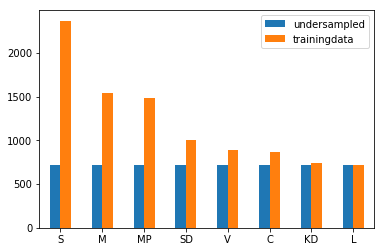

In [274]:
import matplotlib.pyplot as plt
import pandas as pd
#matplotlib inline
undersamples = under_sample.party.value_counts().tolist()
trainingdata = training_data.party.value_counts().tolist()
df = pd.DataFrame({'undersampled': undersamples,'trainingdata': speeches201718},
                  index=training_data.party.value_counts().index)
ax = df.plot.bar(rot=0)

under_sample.party.value_counts().tolist()

In [463]:
text_clf.fit(under_sample.words, under_sample.party)
predicted_balance = text_clf.predict(test_data.words)
print('The Accuracy is %s' % np.mean(predicted_balance == test_data.party))

cr2 = classification_report(y_true = test_data.party,
                      y_pred = predicted_balance,
                      labels=None, target_names=parties,
                      sample_weight=None, digits=2,
                      output_dict=False)
print('The Accuracy is %s' % accuracy_score(predicted_balance, test_data.party))
print(cr2)

The Accuracy is 0.4086993970714901
The Accuracy is 0.4086993970714901
              precision    recall  f1-score   support

           C       0.28      0.40      0.33       671
          KD       0.30      0.40      0.34       821
           L       0.28      0.45      0.34       560
           M       0.39      0.50      0.44      1644
          MP       0.37      0.36      0.37       809
           S       0.79      0.31      0.45      2773
          SD       0.45      0.39      0.42      1060
           V       0.39      0.56      0.46       950

    accuracy                           0.41      9288
   macro avg       0.41      0.42      0.39      9288
weighted avg       0.49      0.41      0.41      9288



*When random sampling is performed on the speeches from each party, we can take the number of samples equal
to the least made by a party, this would give us a balanced dataset. The accuracy of the classifier reduces
in this case from 42.8% to 40.8%. The distribution is parametrized by vectors $\theta_{y} = (\theta_{y1}...\theta_{yn})$, 
for each class y , where n is the number of features (in text classification,the size of the vocabulary) and $\theta_{yi}$ is the probability  of feature appearing in a sample belonging to class.* 
The parameters $\theta_{yi}$  is estimated by a smoothed version of maximum likelihood, i.e. relative frequency counting:
$\hat\theta = \frac{{N}_{yi} + \alpha}{{N}_{yi} + \alpha n}$
where $N_{yi}=\sum{x_i}$ is the number of times feature  appears in a sample of class  in the training set and $N_{y} = \sum{N_{yi}}$ is the total count of all features for class y.

## Problem 5: Confusion matrix

A **confusion matrix** is a specific table layout that is useful when analysing the performance of a classifier. In this matrix, both the rows and the columns correspond to classes, and each cell $(i, j)$ states how many times a sample with gold-standard class $i$ was predicted as belonging to class $j$.

In scitkit-learn, the confusion matrix of a classifier is computed by the function [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

Your task is to use the confusion matrix to find, for each given party $p$ in the Riksdag, that other party $p'$ which the classifier that you trained in Problem&nbsp;4 most often confuses $p$ with when it predicts the party of a speaker.

Text(33.0, 0.5, 'Predicted Class label')

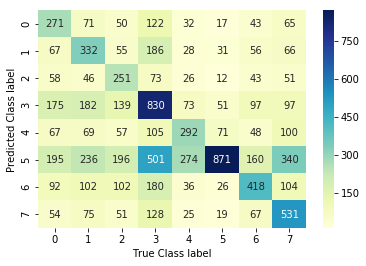

In [464]:
# TODO: Write code here to solve Problem 5
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(test_data.party, predicted_balance)
sns.heatmap(cm2,annot=True,fmt="d",cmap="YlGnBu")
plt.xlabel("True Class label")
plt.ylabel("Predicted Class label")

*The Social Democratic party (S) is most often confused with the Sweden Democrats (SD)
as seen in the confusion matrix with 501 SD occurances classified as S*

## Problem 6: Grid search

Until now, you have been using the vectorizer and the Naive Bayes classifier with their default hyperparameters. When working with real-world applications, you would want to find settings for the hyperparameters that maximize the performance for the task at hand.

Manually tweaking the hyperparameters of the various components of a vectorizer–classifier pipeline can be cumbersome. However, scikit-learn makes it possible to run an exhaustive search for the best hyperparameters over a grid of possible values. This method is known as **grid search**.

The hyperparameters of a pipeline should never be tuned on the final test set. (Why would that be a bad idea?) Instead, one should either use a separate validation set, or run cross-validation over different folds. Here we will use cross-validation.

Implement a grid search with 5-fold cross-validation to find the optimal parameters in a grid defined by the following choices for the hyperparameters:

* In the vectorizer, try a set-of-words model instead of the default bag-of-words model (two possible parameter values).
* Also in the vectorizer, try extracting $n$-grams up to $n = 2$ (two possible parameter values).
* In the Naive Bayes classifier, try using additive smoothing with $\alpha \in \{1, 0{.}1\}$ (two possible parameter values).

Use the class [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from the scikit-learn library. Print the results of your best model, along with the parameter values that yielded these results.

In [340]:
# TODO: Write code here to implement the grid search
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'clf__alpha': (1, .1),
}

In [341]:
gs_clf = GridSearchCV(text_clf, parameters, cv=5, iid=False, n_jobs=-1)
gs_clf = gs_clf.fit(training_data.words, training_data.party)

In [342]:
prediction3 = gs_clf.predict(test_data.words)

In [343]:
gs_clf.best_score_

0.5861476440032725

In [344]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.1
vect__ngram_range: (1, 1)


In [345]:
cv_results = pd.DataFrame(gs_clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,param_vect__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.703562,0.288522,1.329843,0.090051,1,"(1, 1)","{'clf__alpha': 1, 'vect__ngram_range': (1, 1)}",0.514771,0.509923,0.521669,0.500000,0.486212,0.506515,0.012362,3
1,24.734096,2.949808,2.536418,0.234567,1,"(1, 2)","{'clf__alpha': 1, 'vect__ngram_range': (1, 2)}",0.420478,0.404617,0.409072,0.419773,0.403082,0.411404,0.007391,4
2,7.010252,2.805393,4.041192,3.180530,0.1,"(1, 1)","{'clf__alpha': 0.1, 'vect__ngram_range': (1, 1)}",0.603804,0.625759,0.592548,0.562804,0.545823,0.586148,0.028610,1
3,24.981339,7.912759,2.281698,0.472917,0.1,"(1, 2)","{'clf__alpha': 0.1, 'vect__ngram_range': (1, 2)}",0.582760,0.602673,0.596193,0.559157,0.567721,0.581701,0.016460,2


In [353]:
print('accuracy %s' % accuracy_score(test_data.party, prediction3))

accuracy 0.4837424633936262


In [348]:
cm3 = classification_report(test_data.party, prediction3)
print(cm3)

              precision    recall  f1-score   support

           C       0.39      0.27      0.32       671
          KD       0.45      0.24      0.31       821
           L       0.37      0.26      0.30       560
           M       0.44      0.58      0.50      1644
          MP       0.32      0.46      0.38       809
           S       0.61      0.65      0.63      2773
          SD       0.49      0.43      0.45      1060
           V       0.50      0.42      0.46       950

    accuracy                           0.48      9288
   macro avg       0.45      0.41      0.42      9288
weighted avg       0.48      0.48      0.48      9288



## Problem 6: Try to improve your results

Scikit-learn makes it easy to test different vectorizer–classifier pipelines – among other things, it includes different types of logistic regression classifiers, support vector machines, and decision trees. Browse the library to see which methods are supported.

Build a pipeline that you find interesting, and use grid search to find optimal settings for the hyperparameters. Print the results of your best model. Did you manage to get better results than the ones that you obtained in Problem&nbsp;5? Answer with a short text.

*Logistic Regression used as a classifier*

In [360]:
# TODO: Write code here to search for a better model
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
lr = Pipeline([('vect', CountVectorizer()),
               ('clf', LogisticRegression(),),
              ])
lr.fit(training_data.words, training_data.party)

C:\Users\Omkar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Omkar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                          

In [350]:
predictions4 = lr.predict(test_data.words)
print('accuracy %s' % accuracy_score(predictions4, test_data.party))
print(classification_report(test_data.party, predictions4))

accuracy 0.4992463393626184
              precision    recall  f1-score   support

           C       0.44      0.34      0.39       671
          KD       0.47      0.20      0.28       821
           L       0.42      0.30      0.35       560
           M       0.50      0.55      0.52      1644
          MP       0.30      0.39      0.34       809
           S       0.55      0.76      0.64      2773
          SD       0.52      0.41      0.46      1060
           V       0.60      0.32      0.42       950

    accuracy                           0.50      9288
   macro avg       0.48      0.41      0.43      9288
weighted avg       0.50      0.50      0.48      9288



Text(33.0, 0.5, 'Predicted Class label')

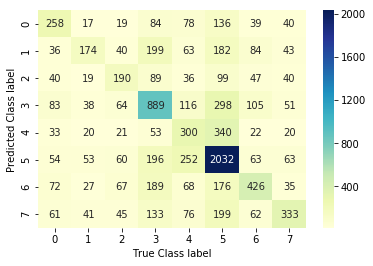

In [459]:
cm4 = confusion_matrix(test_data.party, predictions4)
sns.heatmap(cm4,annot=True,fmt="d",cmap="YlGnBu")
plt.xlabel("True Class label")
plt.ylabel("Predicted Class label")

In [445]:
#pipeline of feature engineering and model
from sklearn.linear_model import SGDClassifier
from time import time
import logging
from pprint import pprint
lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier(tol=1e-3)),
              ])
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
     #'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
     'tfidf__use_idf': (True, False),
     #'tfidf__norm': ('l1', 'l2'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
     #'clf__max_iter': (10, 50, 80),
}

*SGD classifier model with gridsearch:*

In [446]:
grid_search = GridSearchCV(lr, parameters, cv=5,
                               n_jobs=-1, verbose=1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in lr.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(training_data.words, training_data.party)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__max_iter': (20,),
 'clf__penalty': ('l2', 'elasticnet'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 30.3min finished


done in 1843.896s

Best score: 0.661
Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 20
	clf__penalty: 'elasticnet'
	tfidf__use_idf: True
	vect__max_df: 0.5
	vect__ngram_range: (1, 2)


C:\Users\Omkar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [449]:
cv_results2 = pd.DataFrame(gs_clf.cv_results_)
cv_results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,param_vect__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.703562,0.288522,1.329843,0.090051,1,"(1, 1)","{'clf__alpha': 1, 'vect__ngram_range': (1, 1)}",0.514771,0.509923,0.521669,0.500000,0.486212,0.506515,0.012362,3
1,24.734096,2.949808,2.536418,0.234567,1,"(1, 2)","{'clf__alpha': 1, 'vect__ngram_range': (1, 2)}",0.420478,0.404617,0.409072,0.419773,0.403082,0.411404,0.007391,4
2,7.010252,2.805393,4.041192,3.180530,0.1,"(1, 1)","{'clf__alpha': 0.1, 'vect__ngram_range': (1, 1)}",0.603804,0.625759,0.592548,0.562804,0.545823,0.586148,0.028610,1
3,24.981339,7.912759,2.281698,0.472917,0.1,"(1, 2)","{'clf__alpha': 0.1, 'vect__ngram_range': (1, 2)}",0.582760,0.602673,0.596193,0.559157,0.567721,0.581701,0.016460,2


In [452]:
prediction5 = grid_search.predict(test_data.words)
print('accuracy %s' % accuracy_score(prediction5, test_data.party))
print(classification_report(test_data.party, prediction5))

accuracy 0.5648148148148148
              precision    recall  f1-score   support

           C       0.59      0.40      0.48       671
          KD       0.55      0.30      0.39       821
           L       0.52      0.39      0.45       560
           M       0.54      0.60      0.57      1644
          MP       0.39      0.41      0.40       809
           S       0.60      0.80      0.69      2773
          SD       0.61      0.52      0.56      1060
           V       0.64      0.44      0.52       950

    accuracy                           0.56      9288
   macro avg       0.55      0.48      0.51      9288
weighted avg       0.57      0.56      0.55      9288



Text(33.0, 0.5, 'Predicted Class label')

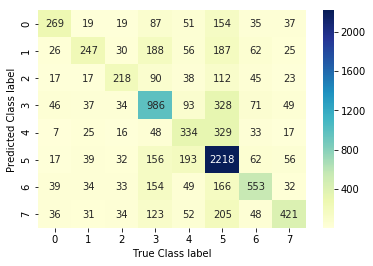

In [460]:
cm5 = confusion_matrix(test_data.party, prediction5)
sns.heatmap(cm5,annot=True,fmt="d",cmap="YlGnBu")
plt.xlabel("True Class label")
plt.ylabel("Predicted Class label")

*In Question 5 and 6, we optimised the parameters of the Multinomial Naive Bayes
Classifier using grid search which yielded an accuracy of 48%. A Logistic Regression gave us an accuracy of 50%. 
To improve upon the results:
A regularised linear classfier with Stochastic Gradient Descent learning whose hyperparameters were optimised as seen above. This yielded an accuracy of 56.48% after 30.3 minutes of learning. A more exhaustive search in the hyperparameters is possible but it is computationally expensive.*

<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>